In [1]:
import numpy as np
import pandas as pd

import time
import random
import pickle
from collections import Counter

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier

In [2]:
import holoviews as hv
hv.extension('matplotlib')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W

***

# FUNCTIONS:

### Fn1: RETURNS CLASSIFICATIONS REPORT & PLOTS:

In [3]:
def retrn_classification_report(model, X_train, y_train, X_test, y_test):
    
    def retrn_cm_elements_plot(model, data, labels, train_or_test):

        y_pred = model.predict(data)
        cm = confusion_matrix(labels, y_pred)

        true_pos   = cm[1, 1]
        true_neg   = cm[0, 0]
        n_pos_pred = cm[:, 1].sum()
        n_neg_pred = cm[:, 0].sum()
        n_pos = cm[1, :].sum()
        n_neg = cm[0, :].sum()
        recal_pos = true_pos/n_pos
        recal_neg = true_neg/n_neg
        preci_pos = true_pos/n_pos_pred
        preci_neg = true_neg/n_neg_pred

        xs = ['POS_pred', 'NEG_pred']
        ys = [n_pos_pred, n_neg_pred]
        ys1 = [true_pos, true_neg]  

        kdims = train_or_test
        vdims = 'YELLOW = FALSE'
        plot1 = hv.Bars((xs, ys), kdims = kdims, vdims = vdims).options(alpha = 0.8, fig_size = 125, color = 'y')
        plot2 = hv.Bars((xs, ys1), vdims = vdims).options(alpha = 0.6, color = 'g')
        plot = plot1 * plot2

        return plot, true_pos, true_neg, n_pos, n_neg, preci_neg, preci_pos, recal_neg, recal_pos 

    def retrn_report(train_true_pos, train_true_neg, train_n_pos, train_n_neg,
                     train_preci_neg, train_preci_pos, train_recal_neg, train_recal_pos,
                     test_true_pos, test_true_neg, test_n_pos, test_n_neg,
                     test_preci_neg, test_preci_pos, test_recal_neg, test_recal_pos):

        train_acc = (train_true_pos + train_true_neg)/(train_n_pos + train_n_neg)
        test_acc = (test_true_pos + test_true_neg)/(test_n_pos + test_n_neg)
        df_acc = pd.DataFrame([train_acc]).assign(x = [test_acc])
        df_acc.columns = ['train', 'test']
        df_acc.index = ['acc'] 
        df_acc = df_acc*100

        train_precision_col = np.array([train_preci_neg, train_preci_pos]).reshape(2, 1)
        train_recal_col = np.array([train_recal_neg, train_recal_pos]).reshape(2, 1)
        test_precision_col = np.array([test_preci_neg, test_preci_pos]).reshape(2, 1)
        test_recal_col = np.array([test_recal_neg, test_recal_pos]).reshape(2, 1)

        df_classifi_report = pd.DataFrame(train_precision_col).assign(x = train_recal_col)
        df_classifi_report = df_classifi_report.assign(y = test_precision_col, z = test_recal_col)
        df_classifi_report.columns = ['preci_train', 'recal_train', 'preci_test', 'recal_test']
        df_classifi_report.index = ['neg', 'pos'] 
        df_classifi_report = df_classifi_report*100

        return df_acc, df_classifi_report

    listO_listO_params = []
    c = 0
    for data, labels in [(X_train, y_train), (X_test, y_test)]:
        train_or_test = 'train' if c == 0 else 'test'
        listO_params = list(retrn_cm_elements_plot(model, data, labels, train_or_test))
        listO_listO_params.append(listO_params)
        c +=1

    plot_train, plot_test = listO_listO_params[0][0], listO_listO_params[1][0]
    plot_TRAIN_TEST = plot_train + plot_test
    listO_listO_params = listO_listO_params[0][1:] + listO_listO_params[1][1:] 
    
    df_acc, df_classifi_report =  retrn_report(*listO_listO_params)  
    
    return df_acc, df_classifi_report, plot_TRAIN_TEST


### RETURNS CROSS VALIDATION REPORT:

In [4]:
def retrn_cv_report(grid):
    
    mean_train_score = grid.cv_results_['mean_train_score']
    mean_test_score  = grid.cv_results_['mean_test_score']    
    diff_train_test = mean_train_score - mean_test_score
    std_dev_train  = grid.cv_results_['std_train_score'] 
    std_dev_test  = grid.cv_results_['std_test_score'] 
    params = grid.cv_results_['params']
    
    df = pd.DataFrame(mean_train_score, columns = ['mean_train_score'])
    df = df.assign(mean_test_score = mean_test_score, diff_train_test = diff_train_test)
    df = df.assign(std_dev_train = std_dev_train, std_dev_test = std_dev_test)*100
    df = df.assign(params = params)
    df_cv_scores = df
    
    return df_cv_scores
    

***

# DATA:

In [5]:
X = np.load('listO_tf_w2v_textVec.npy')
y = pd.read_csv('df_adjective_text.csv').score

df = pd.DataFrame(X).assign(y = y)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,y
0,-0.049288,0.144348,0.068937,0.071554,-0.012273,0.071699,0.118965,-0.115485,-0.027418,0.177681,...,0.083842,-0.196109,0.121693,-0.024098,0.000053,0.046669,-0.145708,0.050596,0.068606,positive
1,-0.174608,0.117416,0.169675,0.227362,-0.051570,-0.035016,0.136339,-0.008501,0.050530,0.161554,...,-0.222631,-0.135522,-0.047681,0.070261,0.089716,-0.066281,-0.044970,-0.001644,-0.049291,negative
2,-0.097160,-0.043842,0.059814,0.175192,-0.066800,0.094058,0.147436,-0.045031,-0.092099,0.180388,...,-0.090968,0.017774,0.068089,0.019854,0.011404,0.008328,-0.029282,-0.000773,0.066036,positive
3,0.066151,-0.009636,0.072102,0.218845,-0.144453,0.050973,0.178692,-0.210295,-0.084385,0.152354,...,-0.201746,0.006236,0.091028,-0.075942,0.159780,0.068571,0.152060,0.221986,-0.001751,negative
4,0.055556,-0.046451,-0.084545,0.201347,-0.098793,0.012062,0.057963,-0.124287,-0.115966,0.176837,...,-0.071542,-0.153533,-0.068990,0.037154,0.050212,0.120553,0.117851,-0.047633,-0.063400,positive


In [6]:
DistO_cat = Counter(y)
DistO_cat

Counter({'positive': 307016, 'negative': 57103})

### TRAIN - TEST SPLIT:

In [7]:
splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for train_index, test_index in splitter.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

df.shape, X_train.shape, X_test.shape

((364119, 301), (291295, 300), (72824, 300))

***

# 1. GRID SEARCH WITH CROSS VALIDATION:


In [43]:
pipe = Pipeline([('RF', RandomForestClassifier(class_weight = 'balanced'))])

param_grid1 = {'RF__max_features'      : ['auto', 'log2'],
               'RF__max_depth'         : [5, 10, 25, 50, 100, 150, 200, 250, 300]}

grid1 = GridSearchCV(pipe, param_grid1, cv = 3, return_train_score=True, n_jobs = -1)

In [44]:
data = X_train
labels = y_train

%time grid1.fit(data, labels)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Wall time: 8min 9s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'RF__max_features': ['auto', 'log2'], 'RF__max_depth': [5, 10, 25, 50, 100, 150, 200, 250, 300]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [136]:
joblib.dump(grid1, 'RF_grid1.joblib') 

['RF_grid1.joblib']

In [8]:
grid1 = joblib.load('RF_grid1.joblib') 

### CROSS VALIDATION SCORES:

In [9]:
grid = grid1
df_cv_scores = retrn_cv_report(grid)
df_cv_scores

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,67.142072,66.510925,0.631147,0.455608,0.379119,"{'RF__max_depth': 5, 'RF__max_features': 'auto'}"
1,67.266516,66.878251,0.388265,0.612785,0.685075,"{'RF__max_depth': 5, 'RF__max_features': 'log2'}"
2,80.084108,75.317118,4.766989,0.240726,0.213869,"{'RF__max_depth': 10, 'RF__max_features': 'auto'}"
3,78.880516,74.474330,4.406186,0.218093,0.152690,"{'RF__max_depth': 10, 'RF__max_features': 'log2'}"
4,95.833090,83.901543,11.931547,0.134754,0.196252,"{'RF__max_depth': 25, 'RF__max_features': 'auto'}"
5,95.862270,83.772808,12.089463,0.159990,0.075561,"{'RF__max_depth': 25, 'RF__max_features': 'log2'}"
6,96.492559,83.629997,12.862562,0.118106,0.190445,"{'RF__max_depth': 50, 'RF__max_features': 'auto'}"
7,96.443468,83.577130,12.866338,0.126983,0.112809,"{'RF__max_depth': 50, 'RF__max_features': 'log2'}"
8,96.461148,83.726120,12.735028,0.188392,0.163560,"{'RF__max_depth': 100, 'RF__max_features': 'au..."
9,96.542852,83.757703,12.785149,0.064183,0.062826,"{'RF__max_depth': 100, 'RF__max_features': 'lo..."


### FILTERATION FOR FEASIBLE MODELS:

In [10]:
generalization_threshold = 5
variance_threshold = 0.5

condition1 = abs(df_cv_scores['mean_train_score'] - df_cv_scores['mean_test_score']) <= generalization_threshold
condition2 = df_cv_scores['std_dev_test'] <= variance_threshold

df_feasible_models = df_cv_scores[condition1 & condition2]
df_feasible_models

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,67.142072,66.510925,0.631147,0.455608,0.379119,"{'RF__max_depth': 5, 'RF__max_features': 'auto'}"
2,80.084108,75.317118,4.766989,0.240726,0.213869,"{'RF__max_depth': 10, 'RF__max_features': 'auto'}"
3,78.880516,74.474330,4.406186,0.218093,0.152690,"{'RF__max_depth': 10, 'RF__max_features': 'log2'}"


# CHOOSING 2 MODELS WHICH GENERALIZE BEST:

### MODEL WITH INDEX 0 in df_feasible_models (MODEL1):

In [115]:
model1 = df_feasible_models.params.values[0]
model1

{'RF__max_depth': 5, 'RF__max_features': 'auto'}

### MODEL WITH INDEX 3 in df_feasible_models (MODEL2):

In [117]:
model2 = df_feasible_models.params.values[2]
model2

{'RF__max_depth': 10, 'RF__max_features': 'log2'}

***

# 2. GRIDSEARCH FOR OPTIMAL "n_estimators" FOR MODEL1:

In [118]:
pipe = Pipeline([('RF', RandomForestClassifier(class_weight = 'balanced'))])

param_grid_model1 = {'RF__n_estimators' : [10, 50, 100, 250, 500, 700],
                     'RF__max_depth'    : [5], 
                     'RF__max_features' : ['auto']}

grid_model1 = GridSearchCV(pipe, param_grid_model1, cv = 3, return_train_score=True, n_jobs = -1)

In [119]:
data = X_train
labels = y_train

%time grid_model1.fit(data, labels)

Wall time: 1h 1min 46s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'RF__n_estimators': [10, 50, 100, 250, 500, 700], 'RF__max_depth': [5], 'RF__max_features': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [187]:
joblib.dump(grid_model1, 'RF_grid_model1.joblib') 

['RF_grid_model1.joblib']

In [11]:
grid_model1 = joblib.load('RF_grid_model1.joblib') 

### CROSS VALIDATION REPORT:

In [12]:
grid = grid_model1
df_cv_scores_model1 = retrn_cv_report(grid)
df_cv_scores_model1

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,68.183113,67.587841,0.595272,0.191476,0.237686,"{'RF__max_depth': 5, 'RF__max_features': 'auto..."
1,69.629585,69.012513,0.617072,0.097914,0.247809,"{'RF__max_depth': 5, 'RF__max_features': 'auto..."
2,69.412967,68.846702,0.566265,0.184444,0.179952,"{'RF__max_depth': 5, 'RF__max_features': 'auto..."
3,69.593196,68.913988,0.679208,0.071142,0.180793,"{'RF__max_depth': 5, 'RF__max_features': 'auto..."
4,69.607271,69.002901,0.604370,0.033609,0.074023,"{'RF__max_depth': 5, 'RF__max_features': 'auto..."
5,69.675758,69.078082,0.597676,0.110285,0.117791,"{'RF__max_depth': 5, 'RF__max_features': 'auto..."


### OPTIMAL "n_estimators" FOR MODEL1:

In [186]:
grid_model1.best_params_  # GRIDSEARCH CHOOSES MODEL WITH BEST ACCURACY RATE

{'RF__max_depth': 5, 'RF__max_features': 'auto', 'RF__n_estimators': 700}

### CLASSIFICATION REPORT FOR MODEL1:

In [188]:
model = grid_model1

df_acc_MODEL1, df_report_MODEL1, plot_TRAIN_TEST_MODEL1 = retrn_classification_report(model, X_train, y_train, X_test, y_test)

In [189]:
df_acc_MODEL1

,train,test
acc,69.123054,68.809733


In [190]:
df_report_MODEL1

,preci_train,recal_train,preci_test,recal_test
neg,29.182854,67.912964,28.681995,66.517818
pos,92.076157,69.348121,91.747416,69.236031


:Layout
   .Overlay.I  :Overlay
      .Bars.I  :Bars   [train]   (YELLOW = FALSE)
      .Bars.II :Bars   [x]   (YELLOW = FALSE)
   .Overlay.II :Overlay
      .Bars.I  :Bars   [test]   (YELLOW = FALSE)
      .Bars.II :Bars   [x]   (YELLOW = FALSE)
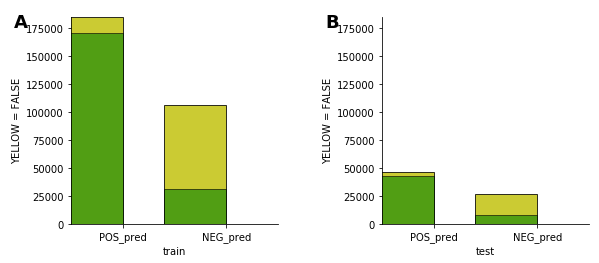

In [191]:
plot_TRAIN_TEST_MODEL1

***

# 3. GRIDSEARCH FOR OPTIMAL "n_estimators" FOR MODEL2:

In [173]:
model2

{'RF__max_depth': 10, 'RF__max_features': 'log2'}

In [174]:
pipe = Pipeline([('RF', RandomForestClassifier(class_weight = 'balanced'))])

param_grid_model2 = {'RF__n_estimators' : [250, 500, 700],
                     'RF__max_depth'    : [10], 
                     'RF__max_features' : ['log2']}

grid_model2 = GridSearchCV(pipe, param_grid_model2, cv = 3, return_train_score=True, n_jobs = -1)

In [175]:
data = X_train
labels = y_train

%time grid_model2.fit(data, labels)

Wall time: 50min 30s


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('RF', RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators='warn', n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'RF__n_estimators': [250, 500, 700], 'RF__max_depth': [10], 'RF__max_features': ['log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [184]:
joblib.dump(grid_model2, 'RF_grid_model2.joblib') 

['RF_grid_model2.joblib']

In [13]:
grid_model2 = joblib.load('RF_grid_model2.joblib') 

### CROSS VALIDATION REPORT:

In [14]:
grid = grid_model2
df_cv_scores_model2 = retrn_cv_report(grid_model2)
df_cv_scores_model2

,mean_train_score,mean_test_score,diff_train_test,std_dev_train,std_dev_test,params
0,83.368235,78.322663,5.045572,0.071081,0.086021,"{'RF__max_depth': 10, 'RF__max_features': 'log..."
1,83.438954,78.371410,5.067543,0.064458,0.103092,"{'RF__max_depth': 10, 'RF__max_features': 'log..."
2,83.437066,78.389605,5.047461,0.071268,0.092268,"{'RF__max_depth': 10, 'RF__max_features': 'log..."


### OPTIMAL "n_estimators" FOR MODEL2:

In [15]:
grid_model2.best_params_ # GRIDSEARCH CHOOSES MODEL WITH BEST ACCURACY RATE

{'RF__max_depth': 10, 'RF__max_features': 'log2', 'RF__n_estimators': 700}

### CLASSIFICATION REPORT FOR MODEL2:

In [192]:
model = grid_model2

df_acc_MODEL2, df_report_MODEL2, plot_TRAIN_TEST_MODEL2 = retrn_classification_report(model, X_train, y_train, X_test, y_test)

In [193]:
df_acc_MODEL2

,train,test
acc,81.024391,77.032297


In [194]:
df_report_MODEL2

,preci_train,recal_train,preci_test,recal_test
neg,43.738986,73.350554,35.840495,58.786446
pos,94.329393,82.451662,91.297998,80.426038


:Layout
   .Overlay.I  :Overlay
      .Bars.I  :Bars   [train]   (YELLOW = FALSE)
      .Bars.II :Bars   [x]   (YELLOW = FALSE)
   .Overlay.II :Overlay
      .Bars.I  :Bars   [test]   (YELLOW = FALSE)
      .Bars.II :Bars   [x]   (YELLOW = FALSE)
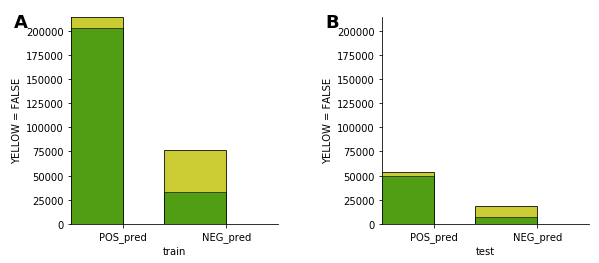

In [195]:
plot_TRAIN_TEST_MODEL2

***

# OBSERVATIONS & CONCLUSIONS:

- FROM THE CLASSIFICATION REPORTS FOR MODELS 1 & 2:
   - MODEL 1 GIVES AN ACCURACY OF 68.80% WITH A NEG RECALL OF 66.5% & POS RECALL OF 69.2%.
   - MODEL 2 GIVES AN ACCURACY OF 77.03% WITH A NEG RECALL OF 58.8% & POS RECALL OF 80.4%.
